In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from functools import partial
from sklearn.externals import joblib
from pathlib import Path
from bio.model import ModelConfig, get_ct
from bio.columns import included_markers
import waterfall_chart

In [3]:
# Name the file where the preprocessed data will be loaded as a Pandas DataFrame
datadir = Path('../data')
fname = datadir / 'nhanes.dat'
df = joblib.load(open(fname, 'rb'))

In [4]:
# Make all this run faster by using just a subset of the data
#df = df.sample(n=10000)

### Create models
Here we define two XGBRegressor models for adults > 18 years. Below that age, `Alkaline Phosphatase, S` becomes two revealing and doesn't tell us anything physiologically interesting.

In [5]:
models = [
        ModelConfig('PATIENT_AGE_YEARS', 'Age (Women)', regression=True, gender=0, age=18),
        ModelConfig('PATIENT_AGE_YEARS', 'Age (Men)', regression=True, gender=1, age=18),
]

### Fit models and generate plots

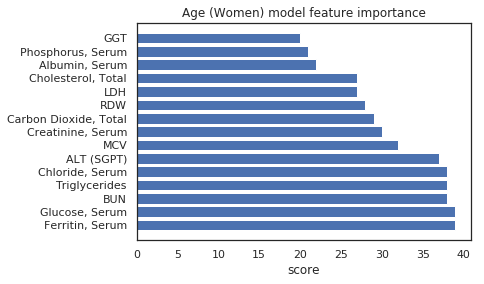

/home/cck197/ml-bio-age/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/cck197/ml-bio-age/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 432x288 with 0 Axes>

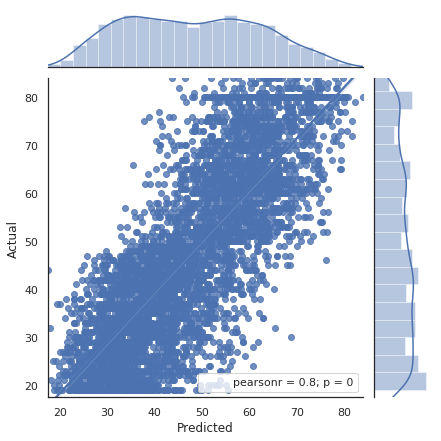

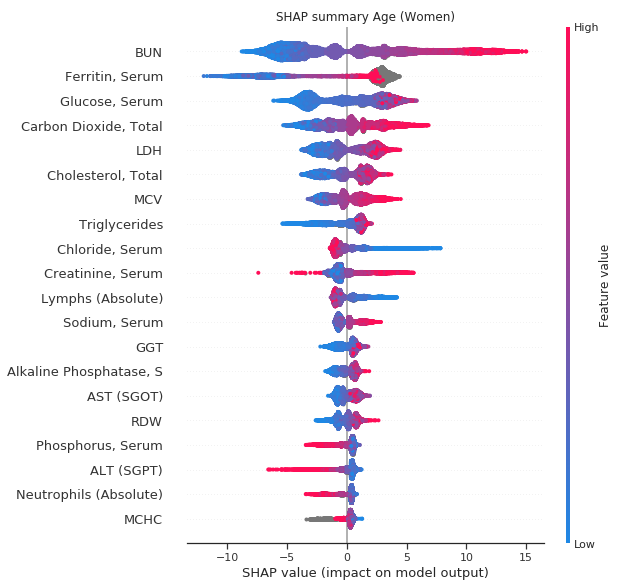

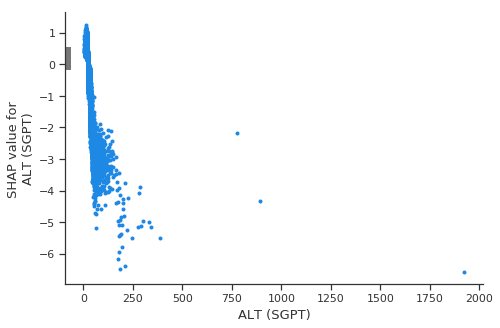

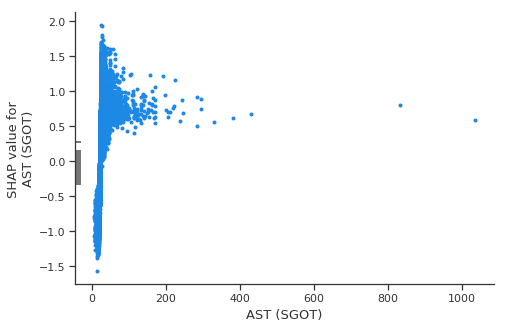

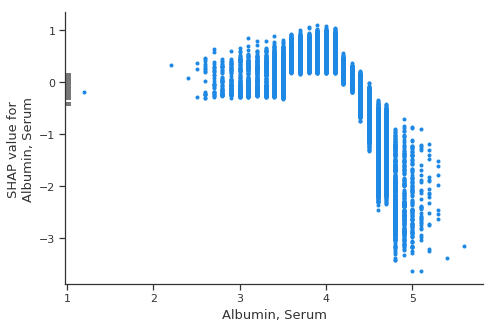

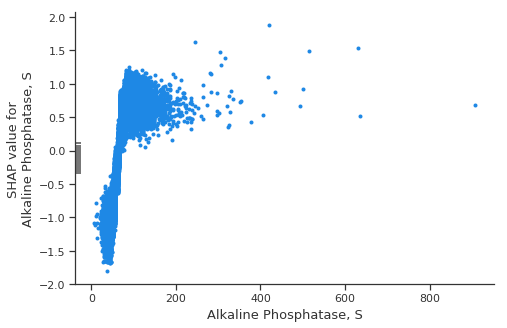

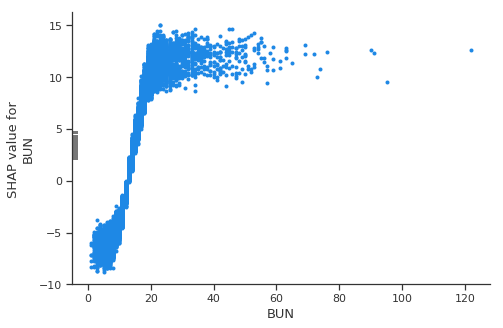

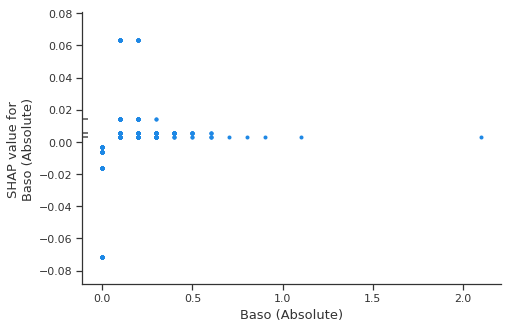

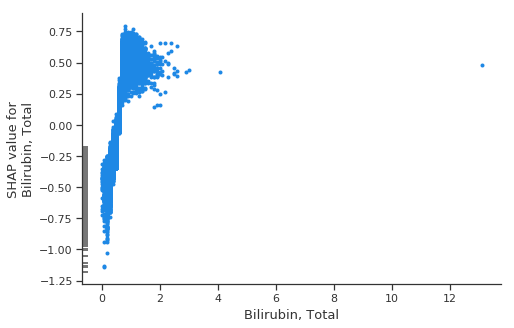

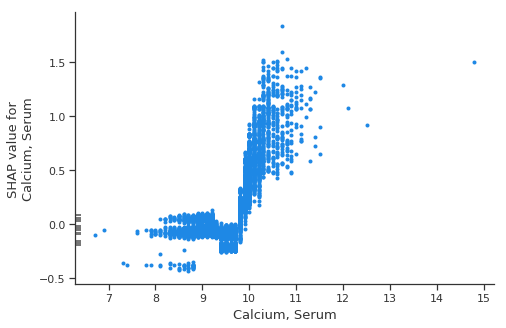

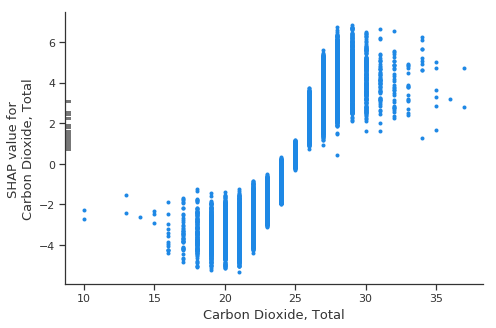

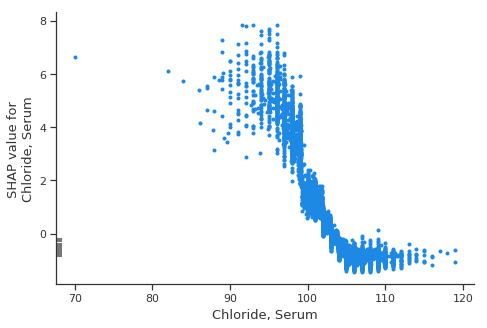

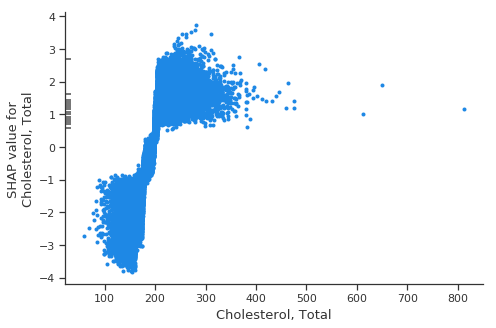

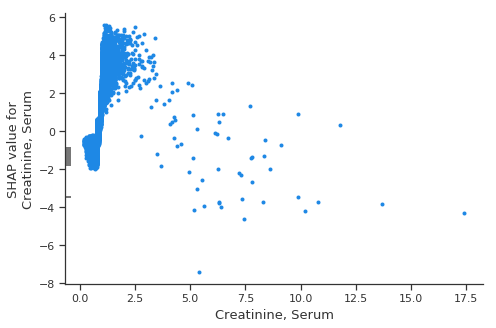

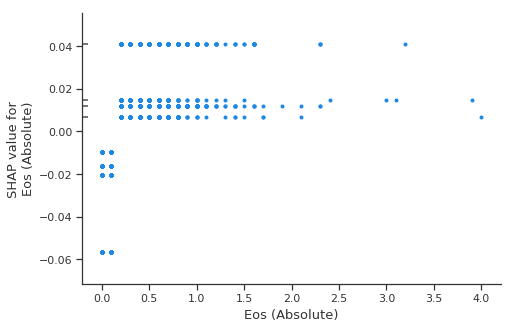

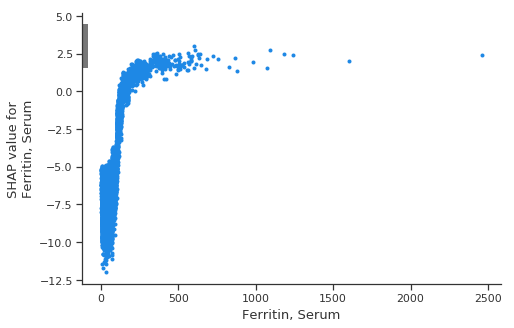

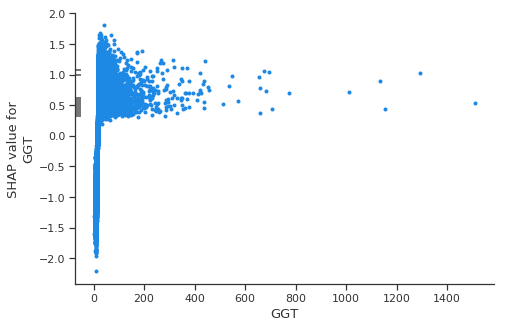

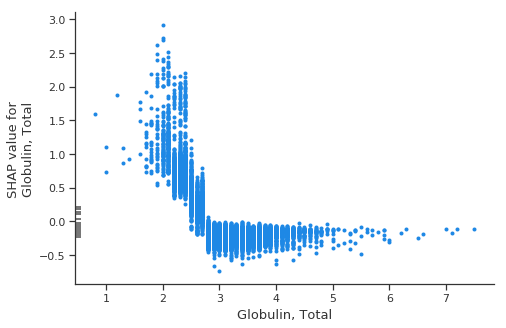

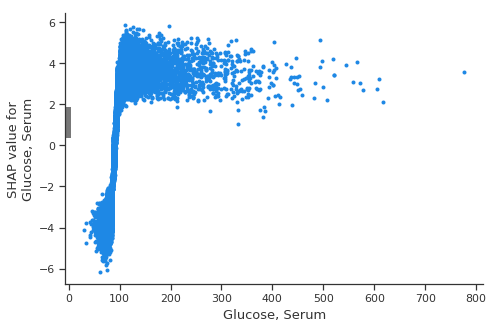

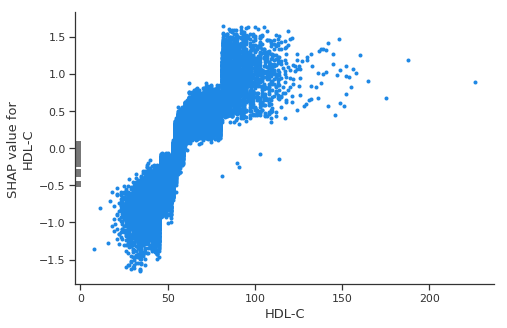

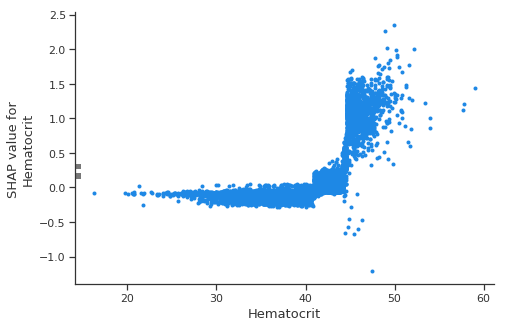

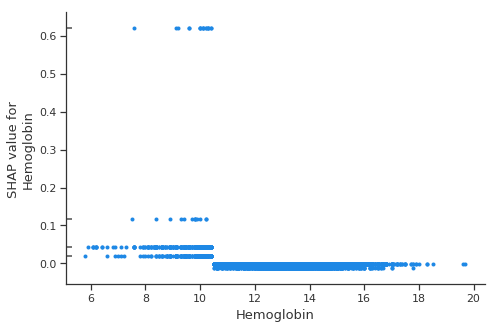

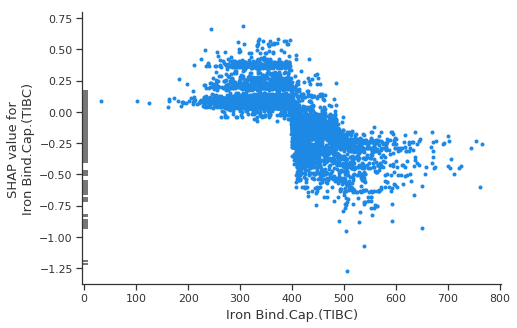

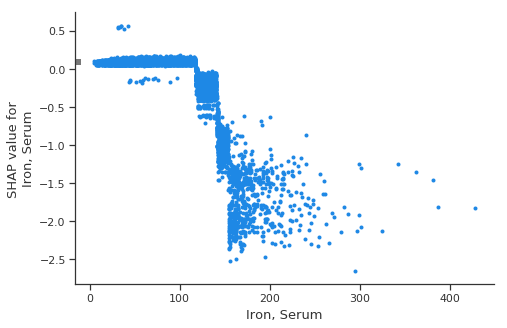

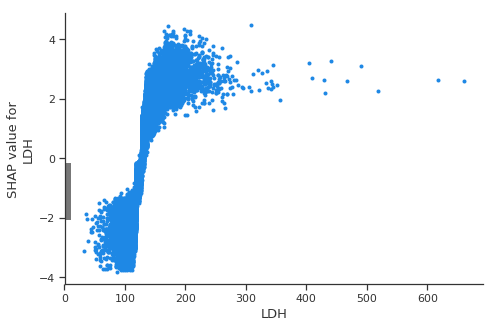

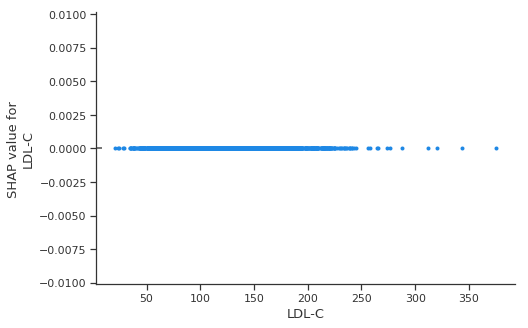

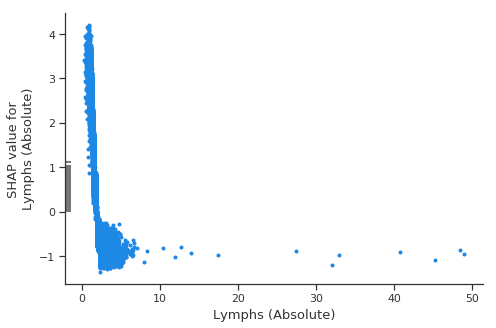

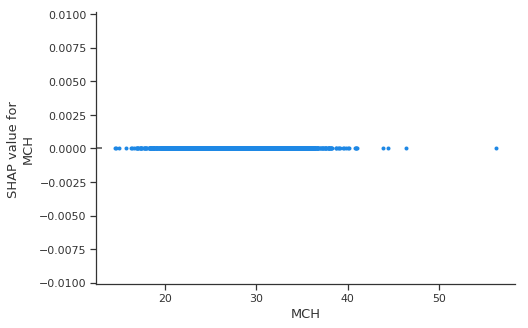

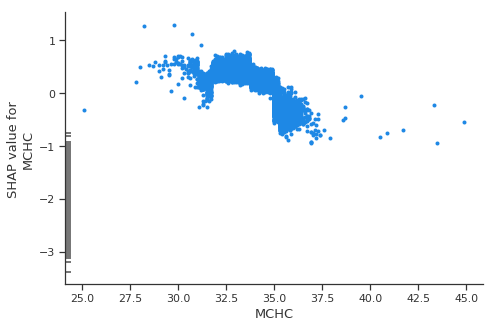

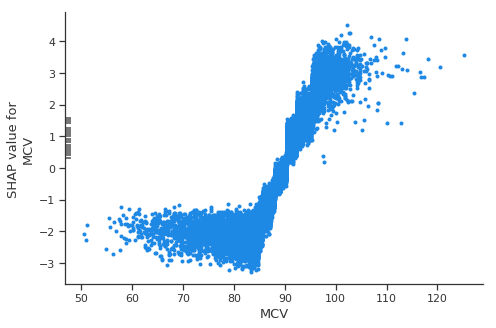

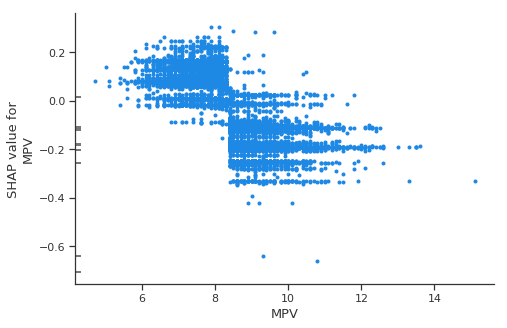

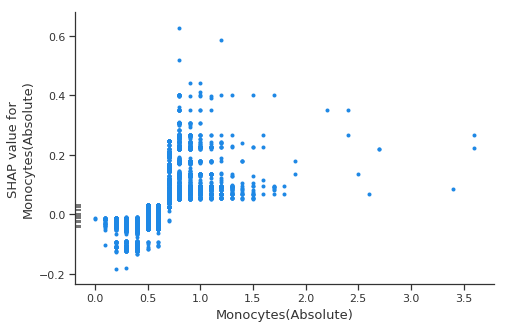

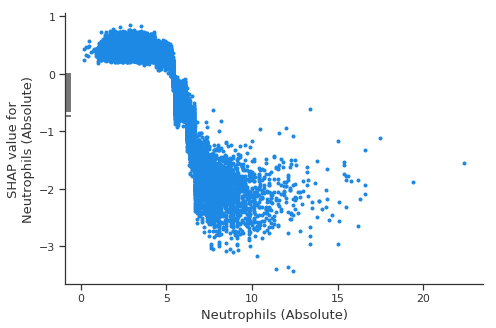

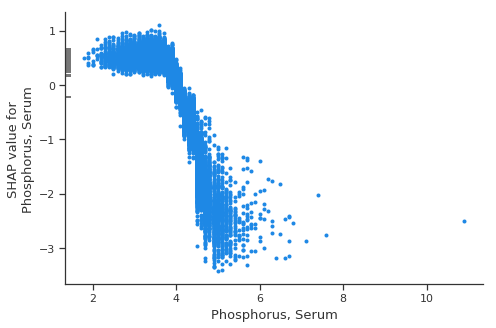

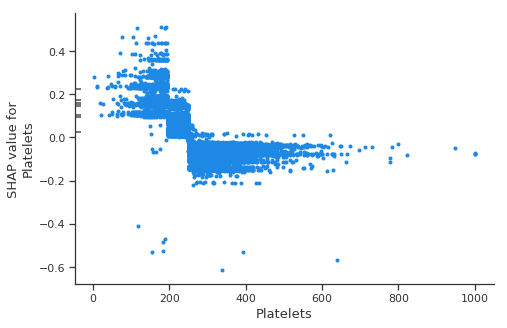

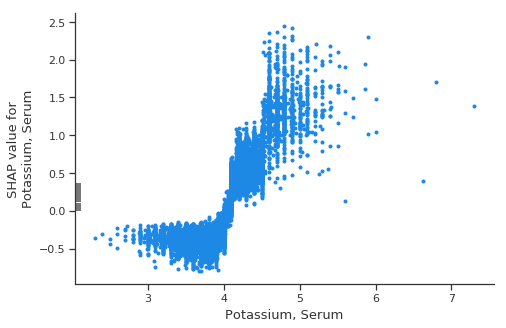

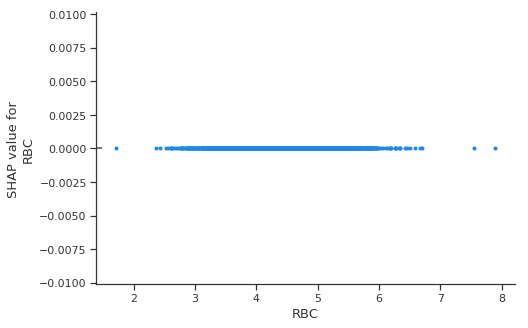

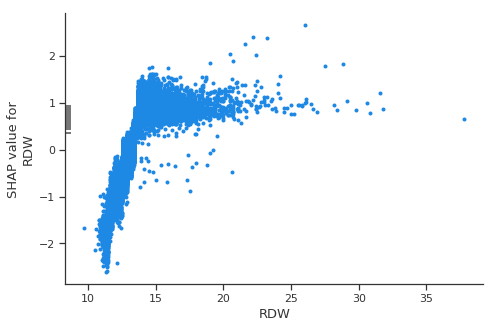

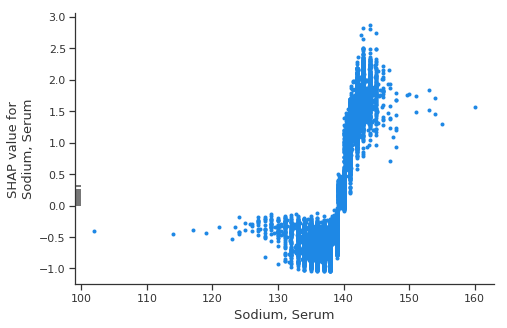

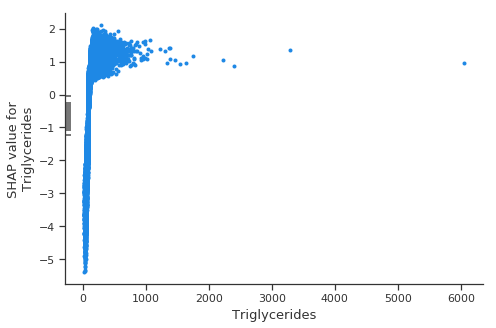

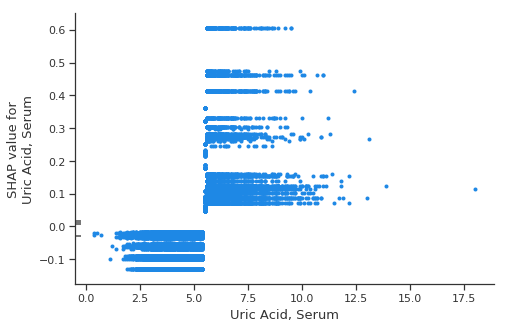

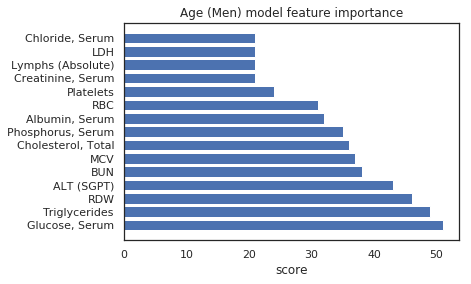

/home/cck197/ml-bio-age/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/cck197/ml-bio-age/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 432x288 with 0 Axes>

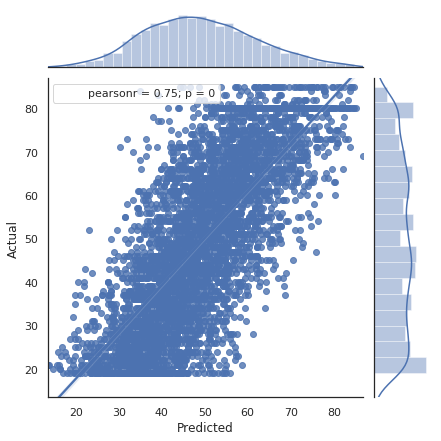

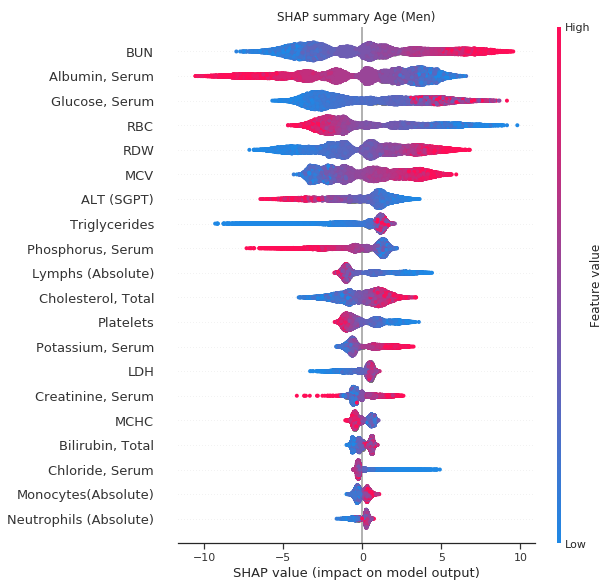

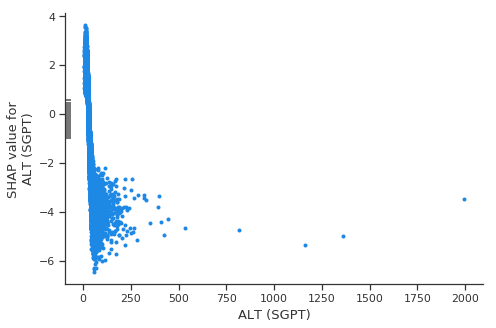

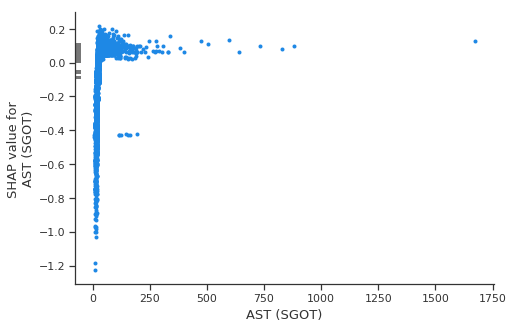

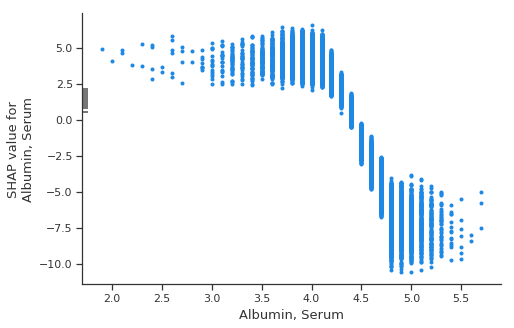

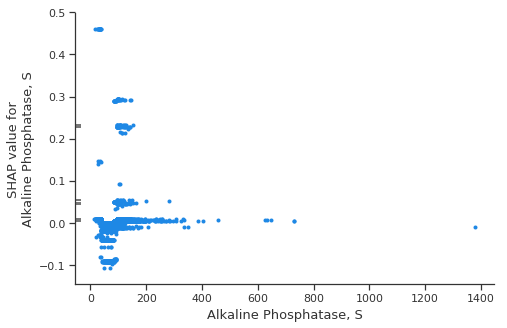

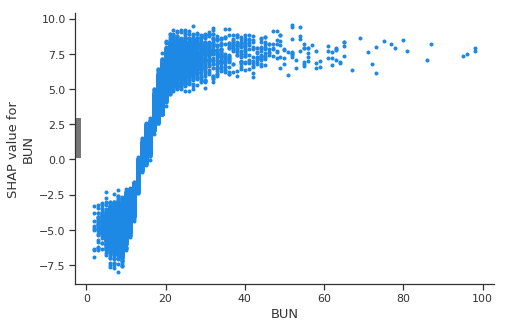

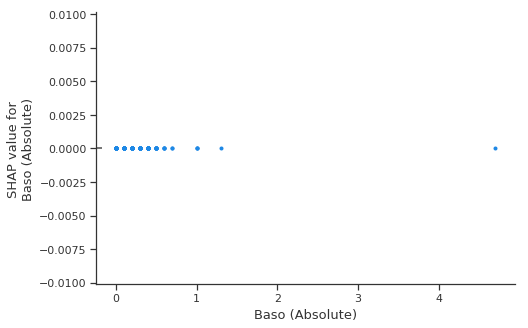

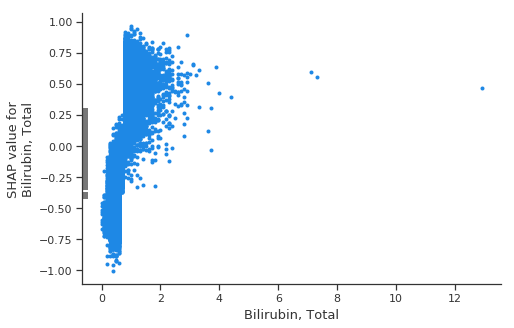

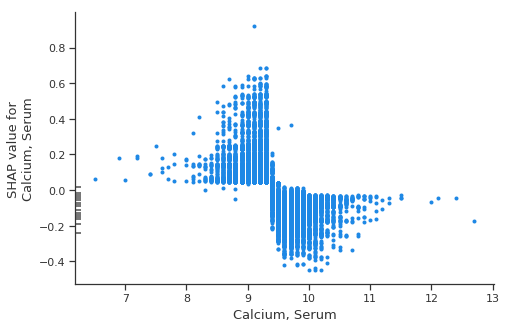

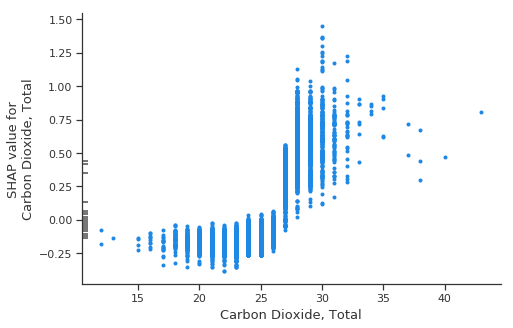

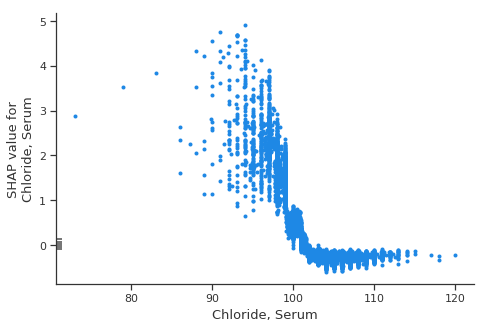

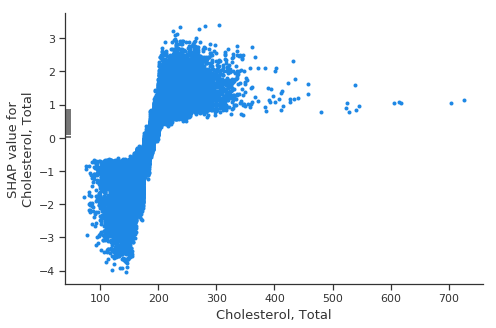

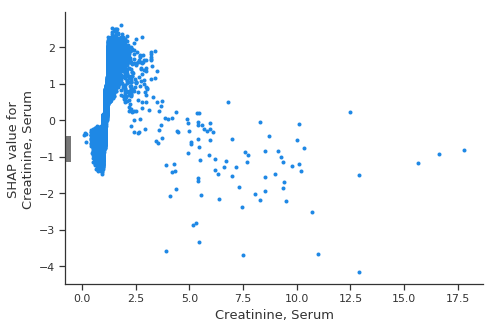

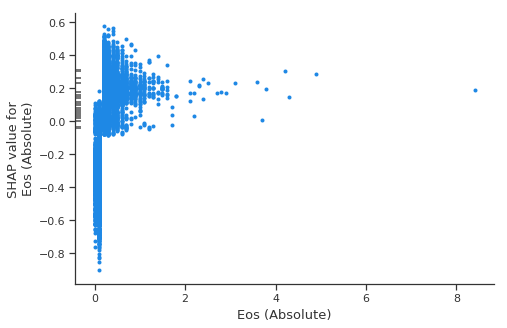

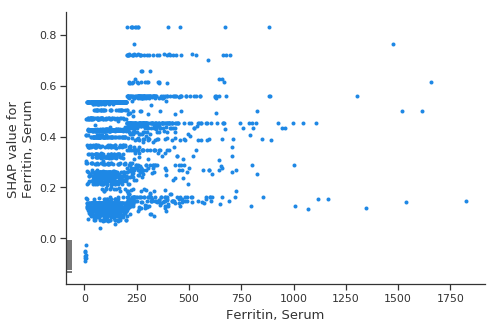

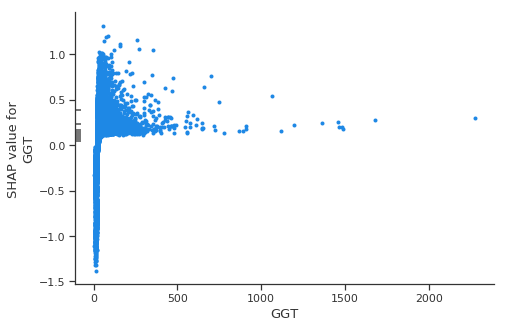

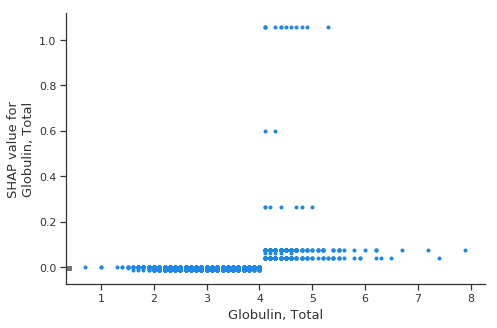

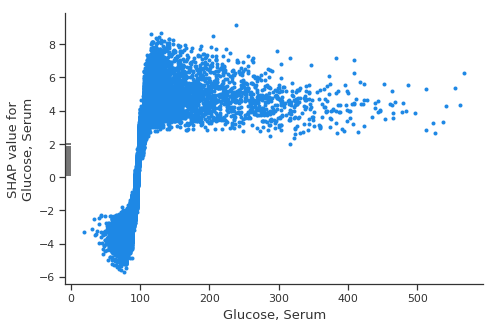

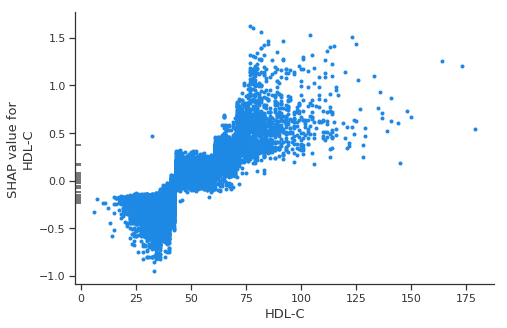

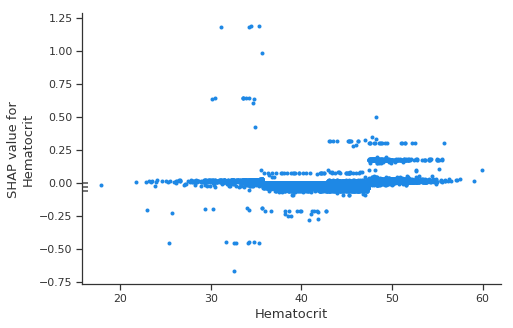

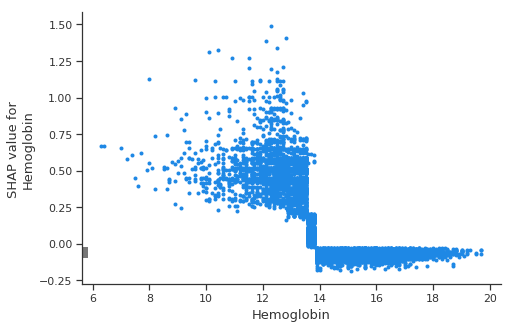

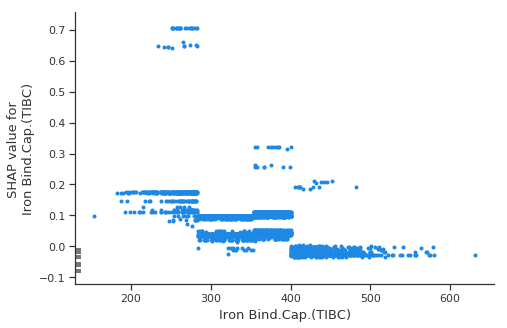

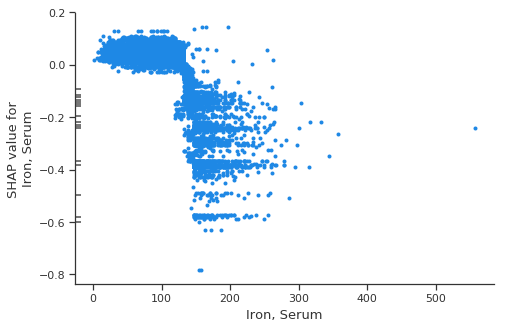

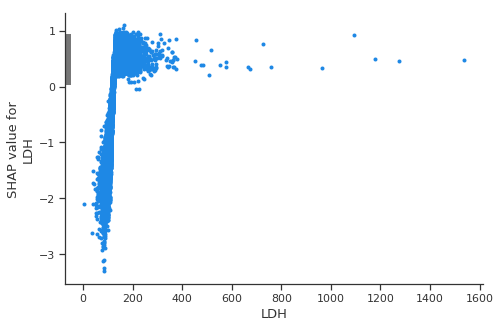

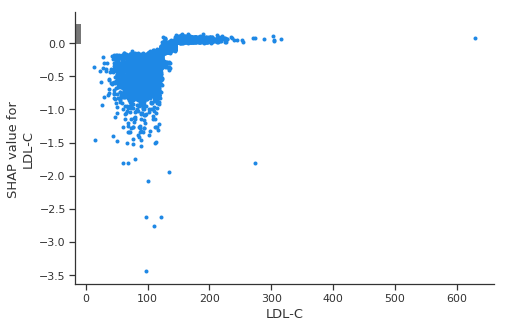

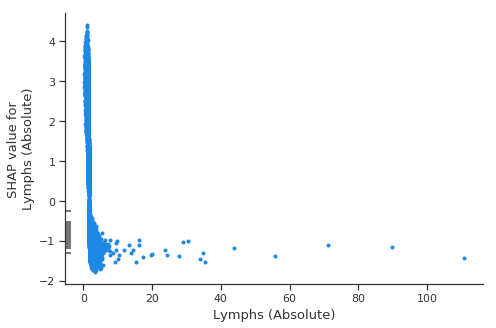

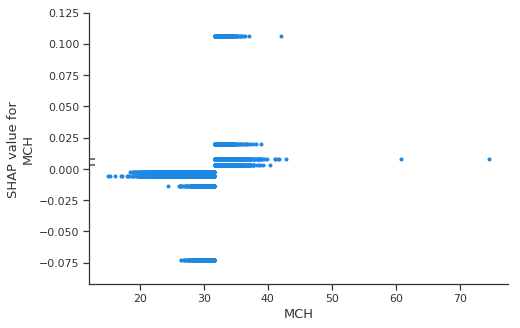

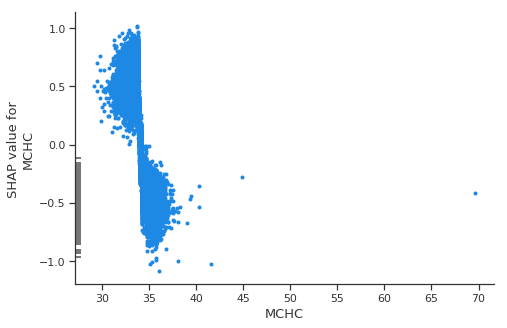

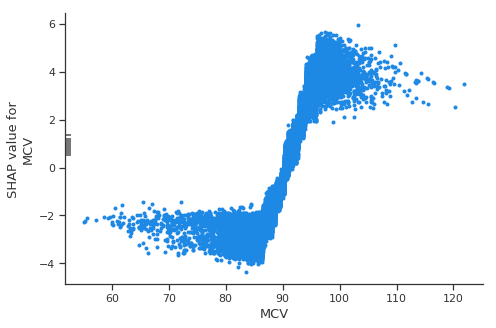

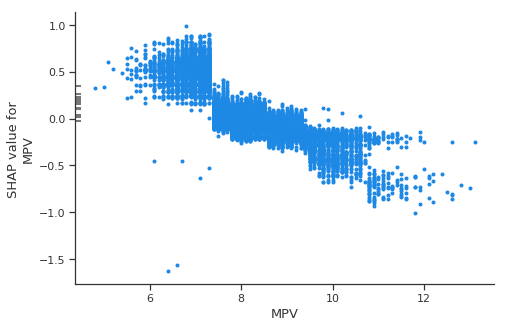

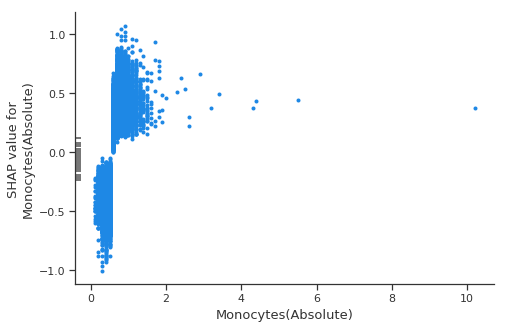

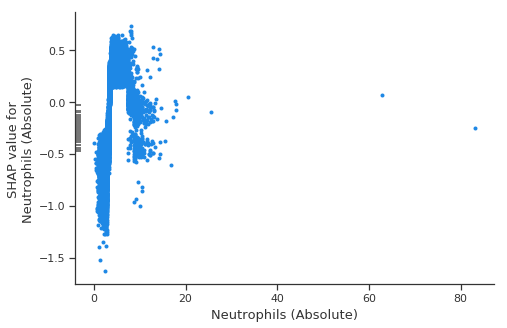

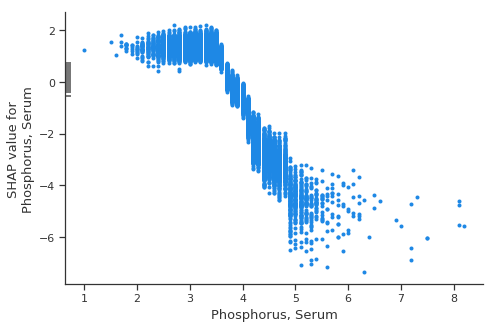

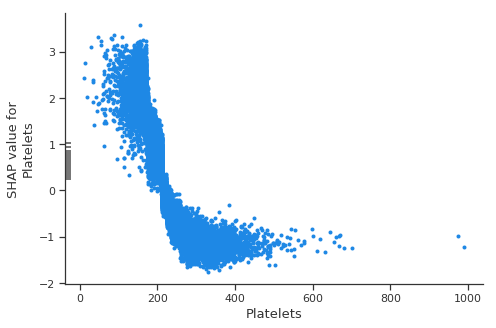

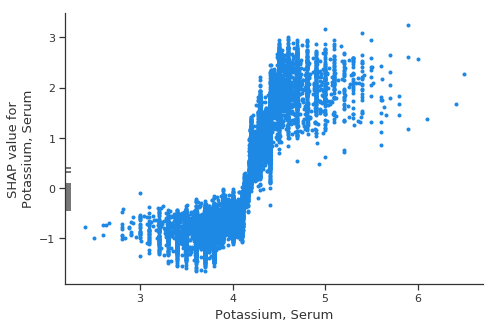

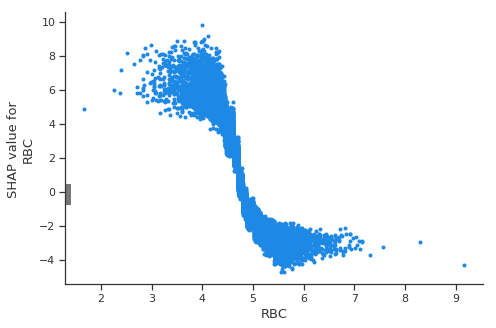

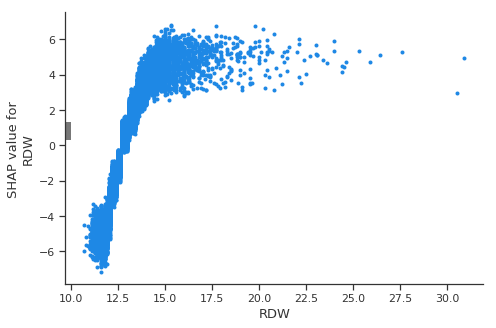

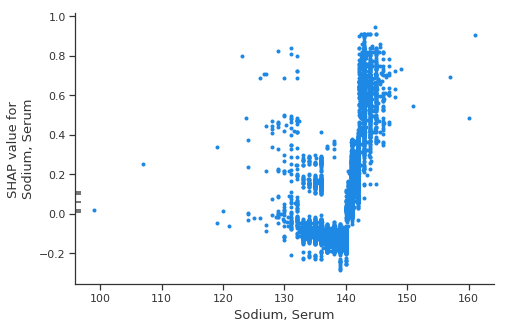

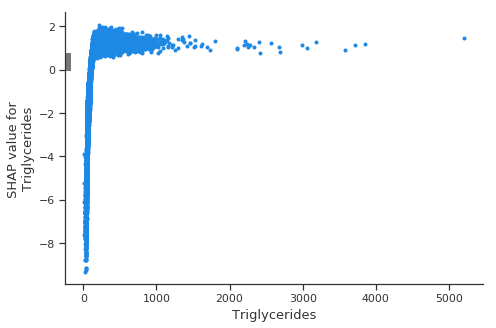

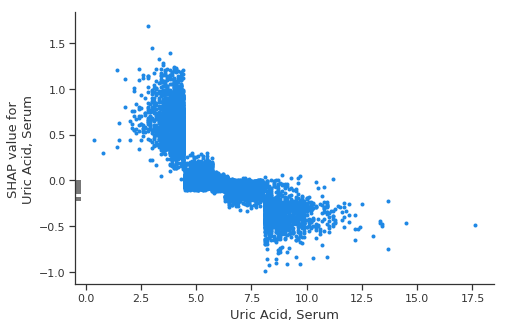

[None, None]

In [6]:
[m.fit(included_markers, partial(get_ct, df)) for m in models]

### Run model on test data and generate waterfall chart

[Sample data](https://github.com/cck197/ml-bio-age/blob/master/data/ck_quest.pdf) from Quest labs.

In [7]:
d = {
    'ALT (SGPT)': 35.0,
    'AST (SGOT)': 30.0,
    'Albumin, Serum': 4.6,
    'Alkaline Phosphatase, S': 50.0,
    'BUN': 19.0,
    'Baso (Absolute)': 0.041,
    'Bilirubin, Total': 0.6,
    'Calcium, Serum': 9.9,
    'Carbon Dioxide, Total': 28.0,
    'Chloride, Serum': 106.0,
    'Cholesterol, Total': 259.0,
    'Creatinine, Serum': 1.18,
    'Eos (Absolute)': 0.25,
    'Ferritin, Serum': 98.0,
    'GGT': 12.0,
    'Globulin, Total': 2.6,
    'Glucose, Serum': 89.0,
    'HDL-C': 84.0,
    'Hematocrit': 45.7,
    'Hemoglobin': 14.9,
    'Iron Bind.Cap.(TIBC)': 293.0,
    'Iron, Serum': 77.0,
    'LDH': 150.0,
    'LDL-C': 160.0,
    'Lymphs (Absolute)': 2.086,
    'MCH': 29.3,
    'MCHC': 32.6,
    'MCV': 90.0,
    'MPV': 10.8,
    'Monocytes(Absolute)': 0.459,
    'Neutrophils (Absolute)': 2.2640000000000002,
    'Phosphorus, Serum': 3.4,
    'Platelets': 232.0,
    'Potassium, Serum': 4.8,
    'RBC': 5.08,
    'RDW': 12.6,
    'Sodium, Serum': 141.0,
    'Transferrin Saturation': 26.0,
    'Triglycerides': 59.0,
    'Uric Acid, Serum': 5.2,
    'name': 'Christopher Kelly',
    'PATIENT_GNDR': 1,
    'email': 'chris@nourishbalancethrive.com',
    'PATIENT_AGE_YEARS': 42}

In [8]:
# Grab the model for men
model = [m for m in models if m.gender == d['PATIENT_GNDR']][0]

In [9]:
# Predict biological age for the sample data
model.predict(d)

44.952694

In [10]:
# Explain the prediction using ELI5
df = model.explain(d)

<module 'matplotlib.pyplot' from '/home/cck197/ml-bio-age/venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

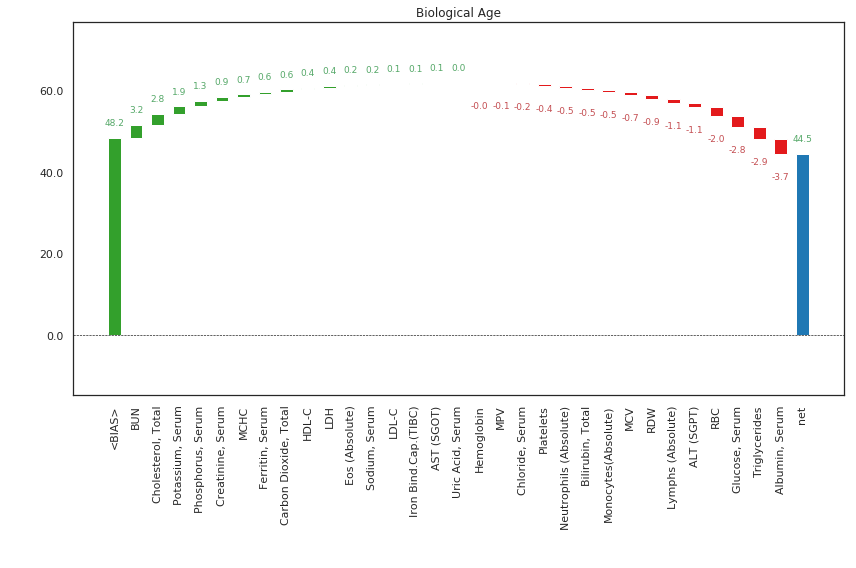

In [11]:
# Plot the explanation as a waterfall chart
waterfall_chart.plot(df['feature'], df['weight'], 
                     rotation_value=90, 
                     figsize=(12, 8), 
                     Title='Biological Age',
                     red_color='#e31a1c',
                     green_color='#33a02c',
                     blue_color='#1f78b4')